## Lliurament tasca 4: Pràctica amb programació numèrica

### Exercici 1:

#### Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [1]:
import numpy as np

def resum_array_1d(ndarray):
    """Imprimeix un resum estadístic bàsic de les dades. Només accepta arrays d'una dimensió."""
    if ndarray.ndim > 1:
        raise ValueError("L'array té més d'una dimensió")
    else:
        print(f"Nombre d'elements: {len(ndarray)}")
        print(f"La mitjana és: {ndarray.mean()}")
        print(f"La mediana és: {np.median(ndarray)}")
        print(f"La desviació estàndard és: {np.std(ndarray)}")
        

_**A continuació comprovem el comportament bàsic de la funció creant un array d'una dimensió amb 10 floats aleatoris:**_

In [2]:
from numpy import random

# Comprovem la funcionalitat bàsica creant un array aleatori
random_ndarray = random.rand(10)
resum_array_1d(random_ndarray)

Nombre d'elements: 10
La mitjana és: 0.35497542746316235
La mediana és: 0.35282950505851046
La desviació estàndard és: 0.2093734678341288


_**I per últim comprovem que l'error té un comportament adequat creant un array de dues dimensions:**_

In [3]:
# Creem un array de dues dimensions i el passem a la funció
array_2d = np.array([[2, 2, 3], [3, 5, 9]])
resum_array_1d(array_2d)

ValueError: L'array té més d'una dimensió

### Exercici 2:

#### Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.


_**Aquesta funció és lleugerament diferent depenent de si es necessiten ints o floats.**_

In [4]:
def genera_quadrat_random_float(width, height):
    """Genera un quadrat width*height de floats aleatoris entre el 0 i el 100."""
    return 100 * random.rand(height, width)

print(genera_quadrat_random_float(3, 2))

[[ 1.95124334 61.26371591 43.40182022]
 [98.70857755 38.48266484 72.62712226]]


In [5]:
def genera_quadrat_random_int(width, height):
    """Genera un quadrat width*height de ints aleatoris entre el 0 i el 100."""
    return random.randint(100, size=(height, width))

print(genera_quadrat_random_int(3, 2))

[[56 29 38]
 [52 28 70]]


### Exercici 3:

#### Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [6]:
def row_column_total(array_2d):
    total_row = array_2d.sum(axis=1)
    total_column = array_2d.sum(axis=0)
    print(f"Totals per fila: {total_row}")
    print(f"Totals per columna: {total_column}")
    
    return total_row, total_column

_**Farem servir la nostra propia funció, ``genera_quadrat_random_int``, per a comprovar els resultats**_

In [7]:
example_array = genera_quadrat_random_int(3, 3)
print(example_array)
row_column_total(example_array)

[[33 23 97]
 [61  5 67]
 [ 5 58 16]]
Totals per fila: [153 133  79]
Totals per columna: [ 99  86 180]


(array([153, 133,  79]), array([ 99,  86, 180]))

### Exercici 4:

#### Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

_**Per a aquest exercici implementarem en codi la següent fòrmula:**_

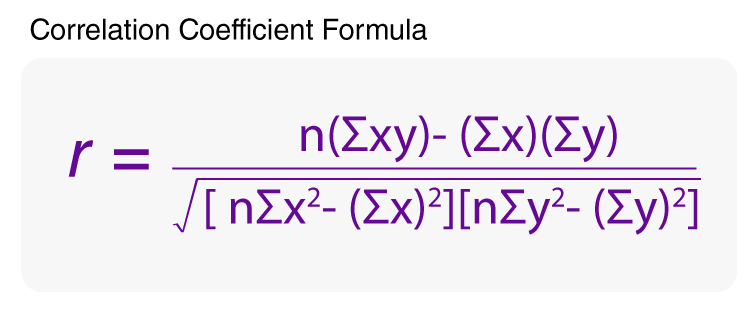

In [8]:
import math

def corrcoef_manual(llista_x, llista_y):
    if len(llista_x) != len(llista_y):
        raise ValueError("Les llistes tenen formes diferents.")
    else:
        total_x = total_y = total_x2 = total_y2 = total_xy = 0
        # Per a una major eficiència, farem ús de zip() per a iterar un sol cop pel dataset sencer.
        for x, y in zip(llista_x, llista_y):
            total_x += x
            total_y += y
            total_x2 += x**2
            total_y2 += y**2
            total_xy += x*y
        
        population = len(llista_x)
    
        # Fòrmula de Pearson
        return (population*total_xy - (total_x*total_y)) / \
                math.sqrt((population*total_x2 - (total_x**2)) * (population*total_y2 - (total_y**2)))

_**Comprovem que la funció calcula el resultat correcte comparant-la amb la funció de numpy**_

In [9]:
sample_x = [3, 5, 12, 8, 10]
sample_y = [3, 6, 7, 12, 2]
print("Coeficient de correlació de numpy:")
print(f"{np.corrcoef(sample_x, sample_y)[0, 1]}")
print("Coeficient de correlació de funció pròpia:")
print(f"{corrcoef_manual(sample_x, sample_y)}")

Coeficient de correlació de numpy:
0.1915318591466032
Coeficient de correlació de funció pròpia:
0.19153185914660323
